In [15]:
# from sklearn.datasets import fetch_california_housing
# housing_data = fetch_california_housing()


import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import pandas as pd
# data = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
# data['target'] = housing_data.target
data = pd.read_csv('housing_data.csv', sep=',', encoding='utf8')

In [17]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
nans = data.isna()
n_nans = nans.sum(axis = 0)
print(n_nans)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [20]:
target = 'target'
feature_names = list(data.columns.values)
feature_names.remove(target)
print(target)
print(feature_names)
print(len(feature_names))

target
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
8


<Axes: >

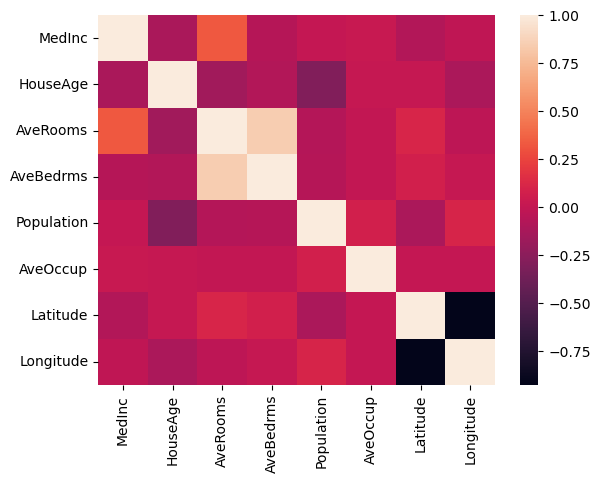

In [21]:
x = data[feature_names].corr()
import seaborn as sns
sns.heatmap(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[feature_names],
                                                    data[target],
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_test,
                                                    y_test,
                                                    train_size=0.6,
                                                    test_size=0.4,
                                                    shuffle=True)
print('train:')
print(len(x_train))
print(len(y_train))

print('valid:')
print(len(x_valid))
print(len(y_valid))

print('test:')
print(len(x_test))
print(len(y_test))

train:
16512
16512
valid:
2476
2476
test:
1652
1652


In [23]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression().fit(x_train, y_train)
print(model_reg.score(x_train, y_train))
print(model_reg.score(x_valid, y_valid))
print(model_reg.score(x_test, y_test))

0.6042501813902609
0.6082833485532737
0.6224284100638684


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
# root_mean_squared_error
  
predicted = model_reg.predict(x_valid)

mae = mean_absolute_error(y_true=y_valid, y_pred=predicted) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_valid, y_pred=predicted) #default=True 
# rmse = root_mean_squared_error(y_true=y_valid, y_pred=predicted) 
  
print("MAE:",mae) 
print("MSE:",mse) 
# print("RMSE:",rmse)

MAE: 0.5449900350109564
MSE: 0.5484261405805109


In [25]:
predicted = model_reg.predict(x_test)

mae = mean_absolute_error(y_true=y_test,y_pred=predicted) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=predicted) #default=True 
# rmse = root_mean_squared_error(y_true=y_test,y_pred=predicted) 
  
print("MAE:",mae) 
print("MSE:",mse) 
# print("RMSE:",rmse)
print()

for i in range(0,10):
    print('Y_TRUE: {0}   \t PRED: {1}'.format(y_test.values[i], predicted[i]))

MAE: 0.5135590867523006
MSE: 0.48745644936309196

Y_TRUE: 1.48   	 PRED: 1.4690570773961014
Y_TRUE: 3.077   	 PRED: 2.5929719414425563
Y_TRUE: 1.967   	 PRED: 2.1713333670159685
Y_TRUE: 1.07   	 PRED: 1.0544943110823155
Y_TRUE: 2.861   	 PRED: 2.559814042740804
Y_TRUE: 0.66   	 PRED: 1.312243816195398
Y_TRUE: 3.3   	 PRED: 2.4596174558455246
Y_TRUE: 1.0   	 PRED: 1.3055930976807417
Y_TRUE: 4.574   	 PRED: 3.129252924361481
Y_TRUE: 2.375   	 PRED: 2.2510831205098043
